# __Renewal process__

__Definition__

Let $\xi_1, \xi_2, \ldots$ i.i.d. positive random variables (i.e. $\mathbb{P}(\xi_i >0)=1$), such that $\mathbb{E}(\xi_i)<\infty$. Let $f$ be the probability density function of $\xi_i$.

Let $T_0=0$ and for each $n>0:$

$$T_n = \sum_{i=1}^n \xi_i,$$
where $T_n$ is referred to as the $n$th jump time, moreover the intervals $[T_n, T_{n+1}]$ are the _renewal intervals_.

Then the __renewal process__ $(X_t)_{t\geq 0}$ is defined as
$$X_t = \sum_{n=1}^\infty \mathbb{1}[T_n \leq t] = \sup \{n: T_n \leq t \}$$

![renewal process](http://math.bme.hu/~marcessz/notebooks/renewal_process.png)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# __Exercise 1__ 

Implement a function that returns $X_t$ for a given $t$, i.e., let $t$ be the input of the function:
1. Let $\xi_i \sim \mathrm{Exp}\left(\frac{1}{2}\right)$. Generate 1000 $\xi_i$ instances. <br> Use np.random.exponential. Note that the parameter of np.random.exponential is not $\lambda$ but the expected value: $1/\lambda$ 
2. Calculate the $T_i$ jump times. <br> Use np.cumsum
3. Get the index of the interval that contains t. The index of this interval is equal to the number of jumps until time $t$, that is $X_t$. <br> Use np.searchsorted with ```side='right'```.
4. Plot $X_t$ function on the $[0,20]$ interval!
    * Create a numpy array $s$ that contains 1000 evenly spaced numbers between 0 and 20. <br> Use np.linspace
    * Plot $X(s)$ against $s$.<br> Use plt.plot
    * Set the names/labels of the axes (plt.xlabel, plt.ylabel)

In [8]:
expectation = 2

In [11]:
rvs=np.random.exponential(expectation,10)

In [12]:
rvs.mean()

1.953493497198594

In [13]:
def X(t):
    # Draw a sample from exponential distribution with 1/lambda=expectation=2
    rv_s = np.random.exponential(expectation, size=1000)
    # Get the jump_times. Use np.cumsum
    jump_times = np.cumsum(rv_s)
    
    # Get the index of the interval that contains t. 
    # The index of the interval is equal to the number of
    # jumps until time t, i.e. X_t
    # Use np.searchsorted
    index = np.searchsorted(jump_times, t, side='right') 
    
    return index

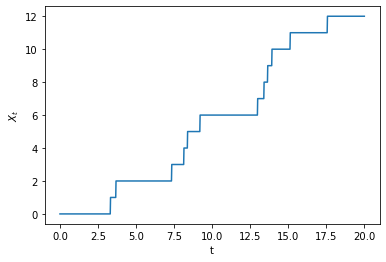

In [14]:
s = np.linspace(0,20,1000)
plt.plot(s, X(s))
plt.xlabel('t')
plt.ylabel(r'$X_t$')
plt.show()

# Inspection paradox

## [The Inspection Paradox is Everywhere](https://towardsdatascience.com/the-inspection-paradox-is-everywhere-2ef1c2e9d709)

A curious feature of renewal processes is that if we wait some predetermined time _t_ and then observe how large the renewal interval containing _t_ is, we should expect it to be typically larger than a renewal interval of average size.

__Where is my bus?__

The inspection paradox also happens when you are waiting for public transportation. Buses are supposed to arrive at constant intervals, but in practice some intervals are longer than others.

You are more likely to arrive during a long interval. Since a random arrival is more likely to fall in a long interval because, well, it’s longer.

# __Exercise 2a__ 

Now we will simulate the buses and the arriving people. 

Write a function, called ```length_of_renewal_intervals```, which has two inputs: ```number_of_steps, number_of_arrivals```.
1. Draw ```number_of_steps``` i.i.d. samples from an exponential distribution, and save it in a variable called ```random_vars```. <br> Use [np.random.exponential](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html). These will be the realizations of $\xi_1, \xi_2, \ldots, \xi_{\text{number_of_steps}}$
2. Create a list of the $T_i$s. You can simply do it with [np.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html). Save this list in a variable called ```jump_times```.
3. Simulate ```number_of_arrivals``` uniform random arrival in the $[T_1, T_{\text{number_of_steps}}]$ interval. <br> Use [np.random.uniform](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html)
4. Find the indices of the renewal intervals containing the uniform random arrivals. <br> Use [np.searchsorted](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.searchsorted.html)
5. Return the length of the renewal intervals observed by the arriving passengers. Moreover also return the actual length of the intervals. 

__This should take you about 15 minutes!__

Hints:

In [15]:
random_vars = np.random.exponential(size=10)

In [16]:
times= np.cumsum(random_vars)

In [17]:
times

array([ 0.75839441,  1.82016901,  4.48357632,  4.67927231,  6.4189845 ,
        7.20031022,  9.98256807, 10.55518242, 11.46173153, 11.63187524])

In [18]:
np.searchsorted(times, 3.2, side='right')

2

In [19]:
np.searchsorted(times, np.random.uniform(times[1], times[-1], 2), side='right')

array([6, 5], dtype=int64)

In [20]:
times[np.array([6, 5])]

array([9.98256807, 7.20031022])

In [21]:
times[np.array([6, 5])] - times[np.array([5, 4])]

array([2.78225785, 0.78132573])

# __Exercise 2b__ 

1. With the help of the previous function, simulate the observed and the real length of the intervals.
2. Compare the means of the two samples. What can you observe?
3. Plot the kernel density estimate (KDE plot) of the two samples on the same figure. Add labels and limit the range of the x axis:
    1. For example ```pd.Series(real).plot.kde(label='real')```. Don't forget to add ```plt.legend()```.
    2. You can limit the range with plt.xlim(0, 7)

__This should take you about 6-8 minutes!__

# __Exercise 2c__

Now we will check the following theorem. 

__Theorem__

$$\lim_{t \to \infty} T_{X_t} - T_{X_t -1} \overset{d}{=}  \hat{\xi}, $$
where 
$$ f_{\hat{\xi}}(x):= \frac{f(x) \cdot x}{\mathbb{E}(\xi)}$$

i.e. the observed intervals have a weighted probability density function, meaning that the probability of observing an interval of length $x$ is weighted/oversampled by $x$.

In [28]:
def pdf_exp(x):
    return np.exp(-x)

In [29]:
def weighted_pdf(x, pdf, cutoff=10):

    return pdf(x) * x

__Task__
1. Plot the KDE plot of the two samples as in the previous exercise
2. In the same figure also plot the theoretical probability density functions, i.e.
    1. Let ```x = np.linspace(0,10,500)```
    2. Plot ```pdf_exp(x)``` against ```x```, and add a label. (Use [plt.plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html))
    3. Plot ```weighted_pdf(x, pdf_exp)``` against ```x```, and add a label.
    4. Limit the x-axis to $[0,7]$.
    

# __Exercise 3a__ 

Check the statement of the following theorem:

__Theorem__

$(X_t)_{t\geq 0}$ satisfy
$$\lim_{t\to\infty} \frac{X_t}{t} = \frac{1}{\mathbb{E}(\xi_1)}$$

(The expected value of the expontential distribution with $\lambda$ parameter is $\frac{1}{\lambda}$)

1. Let $t$ be a numpy array that contains 1000 evenly spaced numbers between 1 and 1500.
2. Plot $\frac{X(t)}{t}$ against $t$:
    * Set the label to $\frac{X_t}{t}$ (```label=r'$\frac{X_t}{t}$'```)
3. Plot a horizontal line at $\frac{1}{\mathbb{E}(\xi)}$ 
    * Let the linestyle be dashed (```ls='--'```)
    * Set its color to red
    * Set the label to $1/\mathbb{E}(\xi)$

__This should take you about 10 minutes!__

# __Exercise 3b__ 

Check the statement of the __Elementary Renewal Theorem__:

$$\lim_{t \to \infty} \frac{\mathbb{E}(X_t)}{t} = \frac{1}{\mathbb{E}(\xi)}  $$

1. Implement a function, called ```EX``` that estimates $\mathbb{E}(X_t)$:
    * Let $X$ and $t$ be the input parameters of the function
    * Create a numpy array that contains 100 realizations of $X_t$
    * Return the mean of this array
2. Let ```EX_np``` be the _vectorized_ function of ```EX```, i.e. ```EX_np = np.vectorize(EX)```. It means that we can add a numpy array as an input of ```EX_np```, i.e. <br> ```EX_np(np.array([t_1, t_2, ..., t_n])) = np.array([EX(t_1), EX(t_2), ..., EX(t_n)])```
3. Let $t$ be a numpy array that contains 100 evenly spaced numbers between 1 and 100.
4. On the same figure plot the following lines:
    * $\frac{\mathbb{E}(X_t)}{t}$ against $t$ and set its label to ```r'$\frac{\mathbb{E}(X_t)}{t}$'```
    * $\frac{X_t}{t}$ against $t$ with the same label as in the previous exercise
    * a horizontal line at $\frac{1}{\mathbb{E}(\xi)}$ with the same label and linestyle as in the previous exercise.

__This should take you about 15 minutes!__

# __Exercise 4__ 

Check the statement of the __Blackwell Renewal Theory__:

$$\lim_{t \to \infty} \mathbb{E}(X_{t+h} - X_t) = \frac{h}{\mathbb{E}(\xi)}  $$

Now let $\xi_i \sim \mathrm{Uni}(\mu - 0.5, \mu + 0.5)$, i.e. $\mathbb{E}(\xi) = \mu$
1. Let $\mu = \mathrm{exp\_uni} = 2$, and $h = 8$. Calculate $\frac{h}{\mathrm{exp\_uni}}$.

2. Copy and modify the function of $X_t$ from __Exercise 1__:
    1. Let $t$, $h=h$, $\mathrm{expected\_value}=\mathrm{exp\_uni}$ be the parameters of the function.
    2. Let $\xi_i \sim \mathrm{Uni}(\mathrm{expected\_value} - 0.5, \mathrm{expected\_value} + 0.5)$. Generate 1000 $\xi_i$ instances. <br> Use np.random.uniform. 
    3. Calculate the jump times as in  __Exercise 1__
    4. Let $\mathrm{index\_t}$ be the index of the interval that contains $t$, i.e. $X_t$
    5. Let $\mathrm{index\_th}$ be the index of the interval that contains $t+h$, i.e. $X_{t+h}$
    6. Return $\mathrm{index\_th} - \mathrm{index\_t}$
3. On the same figure plot the following lines:
    * Let ```t = np.linspace(1,1000,500)```
    * Using the ```EX_np``` function of the previous exercise plot $\mathbb{E}(X_{t+h} - X_t)$
    * Draw a red, dashed horizontal line at $h/\mathbb{E}(\xi)$

__This should take you about 15 minutes!__

In [38]:
exp_uni = 2

In [39]:
h = 8

Expected value of the differences:

In [40]:
h / exp_uni

4.0

# __Exercise 5__ 

__Alternating renewal process__

Let $\xi_i$ be i.i.d. positive random variables. Let $\eta_i$ be i.i.d positive random variables. Then $T_n$ is the _alternating_ sum of these random variables:

$$T_{n} = \xi_1 + \eta_1 + \xi_2 + \eta_2 + \ldots + \xi_{\frac{n}{2}}+ \eta_{\frac{n}{2}}, \quad \text{ if } n \text{ is even}$$


Then the __alternating renewal process__ $(X_t)_{t\geq 0}$ is defined as
$$X_t = \sum_{n=1}^\infty \mathbb{1}[T_n \leq t] = \sup \{n: T_n \leq t \}$$

![alternating_r_p](http://math.bme.hu/~marcessz/notebooks/alternating_renewal_process.png)

__Theorem__

Let $Z_t = 0$ if the interval that contains $t$ is of length $\xi_i$ and $Z_t = 1$ if the interval that contains $t$ is of length $\eta_i$ (colored by red on the figure). 

Then $$\lim_{t \to \infty} \mathbb{P}(Z_t = 1) = \frac{\mathbb{E}(\eta)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$$

i.e. the long-run proportion of time that we are in an interval defined by the distribution of $\eta_i$ is $ \frac{\mathbb{E}(\eta)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$

__Task__

Create an alternating renewal process with $\xi_i \sim \mathrm{Uni}$ and $\eta_i \sim \mathrm{Exp}$, and check the statement of the theorem:

1. Let $\mathrm{expectation\_uni} = 3$, and  $\mathrm{expectation\_exp} = 7$ be the expectation of $\xi_i$ and $\eta_i$ respectively.
2. Write a function, called ```alternating```, that has an input $t$, and does the following:
    * Generates 500 realizations of $\xi_i \sim \mathrm{Uni}(\mathrm{expectation\_uni}-0.5, \mathrm{expectation\_uni}+0.5)$
    * Generates 500 realizations of $\eta_i \sim \mathrm{Exp}(1/\mathrm{expectation\_exp})$
    * Merges the previous two arrays, i.e. creates a numpy array that contains $[\xi_1, \eta_1, \xi_2, \eta_2, \ldots, \xi_{500}, \eta_{500}]$. <br> Use the built-in  ```zip``` python funciton and the [flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html) function of numpy.
    * Calculates the jump times using np.cumsum.
    * Calculates the index of the interval that contains $t$, using np.searchsorted.
    * Return 0 if the index is even and 1 otherwise.
3. Let $t$ be a numpy array containing 800 evenly spaced numbers between 1 and 400.
4. Let ```alternating_proc_data = alternating(t)```
5. On the same figure plot the following lines:
    * The ratio of $Z_s$ is being 1 until time $s$, i.e. plot ```np.cumsum(alternating_proc_data)/np.arange(1,len(t)+1)``` against ```t```
        * Set its label to 'Ratio of exp interval', and the ```alpha=0.8``` 
    * The ratio of $Z_s$ is being 0 until time $s$.
        * Set its label to 'Ratio of uni interval', and the ```alpha=0.8``` 
    * A red dashed horizontal line at $ \frac{\mathbb{E}(\eta)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$
    * A green dashed horizontal line at $ \frac{\mathbb{E}(\xi)}{\mathbb{E}(\xi)+\mathbb{E}(\eta)}$

__This should take you about 20 minutes!__

In [44]:
expectation_uni = 3
expectation_exp = 7